# CREATE MESH PLOT OF DECISION BOUNDARY

**Import neccessary packages and modules**

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression 
np.random.seed(0)
import matplotlib
from matplotlib import pyplot as plt

## 1. Create 2 clusters/classes of 2D data

**Create x values of the 2 clusters**

In [2]:
# std of the random distribution
sigma = 2.5
# size of each class
cls_size = 500
# create feature 1 & feature 2 values of first cluster/class
x11 = np.random.normal(20, sigma, cls_size)
x21 = np.random.normal(20, sigma, cls_size)
# create feature 1 & feature 2 values of second cluster/class
x12 = np.random.normal(45, sigma, cls_size)
x22 = np.random.normal(30, sigma, cls_size)

**Append the feature 1(x1) & feature 2 (x2) values of the 2 clusters**

In [3]:
x1 = np.append(x11,x12)
x2 = np.append(x21,x22)

**Create the labels of the 2 clusters**

Points of 1st cluster are given a label of 0 and points of 2nd cluster are given label of 1

In [4]:
y = [0 for i in range(cls_size)] + [1 for i in range(cls_size)]

**Store the xy data in a pandas dataframe**

In [5]:
data = pd.DataFrame({"x1": x1, "x2": x2, "y":y})

In [6]:
data.head(5)

x1         x2  y
0  24.410131  20.956831  0
1  21.000393  19.914394  0
2  22.446845  22.740867  0
3  25.602233  19.414460  0
4  24.668895  19.131373  0

In [7]:
data.tail(5)

x1         x2  y
995  48.296378  30.244377  1
996  44.401759  33.503809  1
997  44.383016  30.396085  1
998  42.301642  27.145246  1
999  44.714436  26.722574  1

## 2. Scatter plot of different classes

**Extract the data of the 2 classes**

In [8]:
class1 = data[data["y"] == 0]
class2 = data[data["y"] == 1]

**Scatter plot of the 2 classes**

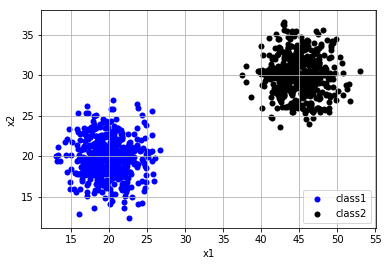

In [9]:
plt.scatter(class1["x1"], class1["x2"], c = 'b', linewidths=0.01, label = 'class1')
plt.scatter(class2["x1"], class2["x2"], c = 'k', linewidths=0.01, label = 'class2')
plt.legend(loc='lower right')
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

## 3. Train classifier to fit the 2 clusters of points

**Features & output of the model**

In [10]:
# features of the model
features = ['x1', 'x2']
# output of the model
output = 'y'

**Create and fit a logistic regression model**

In [11]:
model = LogisticRegression()
model.fit(data[features],data[output])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 4. Visualize the decision boundary using mesh plot

**Create xx, yy matrices of the mesh grid**

In [12]:
# step size and boundary extention in mesh plot
mesh_step = 0.5
boudary_extension = 1.0

################################## Compute the span of the mesh plot ##################################
# calculate the minimum and maximum value along the x axis of the mesh plot
x_min, x_max = data[features[0]].min() - boudary_extension, data[features[0]].max() + boudary_extension
# calculate the minimum and maximum value along the y axis of the mesh plot
y_min, y_max = data[features[1]].min() - boudary_extension, data[features[1]].max() + boudary_extension
#######################################################################################################

# create the xx and yy matrices of mesh grid 
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step), np.arange(y_min, y_max, mesh_step))

**Shape of xx and yy matrices**

In [13]:
xx.shape

(53, 84)

In [14]:
yy.shape

(53, 84)

**Create a two column dataframe which contains flattened data of xx and yy matrices**

In [15]:
# Create a two column dataframe which contains flattened data of xx and yy matrices
# so that we can use this in a machine learning classifier
mesh_points = pd.DataFrame({features[0]: xx.ravel(), features[1]: yy.ravel()})

**Create z points (predictions) of mesh grid**

In [16]:
# compute predictions 
predictions = model.predict(mesh_points[features])
# reshape predictions so that it fits the meshplot
predictions = predictions.reshape(xx.shape)

**Mesh plot which displays the decision boundary**

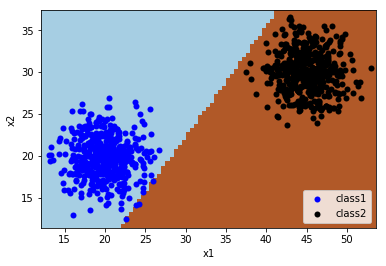

In [17]:
# mesh plot of the predictions 
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
# scatter plots of the 2 classes/clusters of points
plt.scatter(class1["x1"], class1["x2"], c = 'b', linewidths=0.01, label = 'class1')
plt.scatter(class2["x1"], class2["x2"], c = 'k', linewidths=0.01, label = 'class2')
plt.legend(loc='lower right')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## 5. A function to preprocess data for mesh points

In [18]:
def mesh_data(data, features, mesh_step, boudary_extension = .5):

    '''
    A function which creates xx, yy, and flattened mesh points of a 2 feature data
    Arguments:
    data - a pandas dataframe containing the data which gives the 2D span of the mesh plot
    features - the list of 2 features along which mesh plot is going to be plot
    mesh_step - step size in the mesh plot
    boudary_extension - amount of extension beyond the boundary of the mesh plot
    Returns:
    xx - xx points of the mesh plot
    yy - yy points of the mesh plot
    mesh_points - a pandas dataframe containing flattened data of xx and yy matrices
    '''

    # import numpy & pandas
    import numpy as np
    import pandas as pd

    ################################## Compute the 2D span of the mesh plot ##################################
    # calculate the minimum and maximum value along the x axis of the mesh plot
    x_min, x_max = data[features[0]].min() - boudary_extension, data[features[0]].max() + boudary_extension
    # calculate the minimum and maximum value along the y axis of the mesh plot
    y_min, y_max = data[features[1]].min() - boudary_extension, data[features[1]].max() + boudary_extension
    #######################################################################################################
    
    # create the xx and yy matrices of mesh grid 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step), np.arange(y_min, y_max, mesh_step))
    # create a two column dataframe which contains flattened columns of xx and yy matrices
    mesh_points = pd.DataFrame({features[0]: xx.ravel(), features[1]: yy.ravel()})
    # return xx, yy, and flattened mesh points
    return xx, yy, mesh_points